In [57]:
from math import sin
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [58]:
def BW_convert(name):
    image = Image.open(name)
    BW_image = image.convert('L')
    arr = np.array(BW_image,dtype='uint8')
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            if (arr[i,j] <220):
                arr[i,j] = 0
            else: 
                arr[i,j] = 255
    np.savetxt('1',arr)
    BW_image = Image.fromarray(arr)
    BW_image.save('result_bw.png')

In [103]:
name = 'captcha.jpg'
BW_convert(name)
image = Image.open('result_bw.png')
arr = np.array(image,dtype='uint8')

In [147]:
filter = 32
x0 = 0
x,y = image.size
step = 32
dx = x/step

0 . 16.0
32 . 76.0
64 . 73.0
96 . -4.0
128 . 5.0


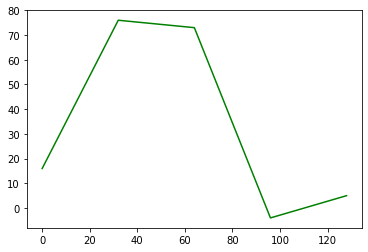

In [148]:
if(dx%1 != 0):
    dx = int(dx) + 1
else:
    dx = int(dx)
numbers_arr = np.zeros(shape=(dx))

while (dx > 0):
    summs = 0
    for i in range(arr.shape[0]):
        for j in range(x0,x0 + filter,1):
            if (arr[i,j] == 0):
                if (j - x0 < (filter)/2):
                    summs = summs - 1
                else:
                    summs = summs + 1
    numbers_arr[numbers_arr.size-dx] = summs
    x0 = x0 + step
    if (x0 + filter > x):
        overpoint = x0 + filter - x
        x0 = x0 - overpoint
    dx = dx - 1

arr_x = []
for i in range(0,x,step):
    arr_x.append(i)

n = 0
for i in numbers_arr:
    print(arr_x[n],'.',i)
    n = n + 1

plt.plot(arr_x, numbers_arr, 'g')
plt.show()